In [1]:
# coding: utf-8

import numpy as np
import torch
import os
import time

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline  

from networks import *
from torch.utils.data import DataLoader
from dataset_factory import DatasetFactory, ROOT_DIR
import multiprocessing
from tqdm import tqdm

# gpu setting
os.environ["CUDA_VISIBLE_DEVICES"]="1"
torch.backends.cudnn.enabled = True
gpus = [0,1]
device = torch.device("cuda" if True else "cpu")
num_threads = multiprocessing.cpu_count()
print("GPU NUM: %d, Thread NUM: %d"%(torch.cuda.device_count(),num_threads))

GPU NUM: 1, Thread NUM: 20


In [2]:
# load pretrain model
modelpath = "./models/resnet18_224_best.t7"

if 'resnet' in modelpath:
    modeltype = "resnet"
    if "18" in modelpath:
        nlayers = 18
    elif "34" in modelpath:
        nlayers = 34
    net = CoordRegressionNetwork(n_locations=16, layers=nlayers).to(device)
    inputsize = 224
elif "mobilenet" in modelpath:
    modeltype = "mobilenet"
    net = MobileNetV2(image_channel=3).to(device)
    inputsize = 224

train_dataset = DatasetFactory.get_train_dataset(modeltype, inputsize)
train_dataloader = DataLoader(train_dataset, batch_size=256,
                        shuffle=True, num_workers = num_threads)

test_dataset = DatasetFactory.get_test_dataset(modeltype, inputsize)
test_dataloader = DataLoader(test_dataset, batch_size=256,
                        shuffle=False, num_workers = num_threads)



  0%|          | 0/8 [00:00<?, ?it/s]


average forward seconds=0.106592 s| fps=9


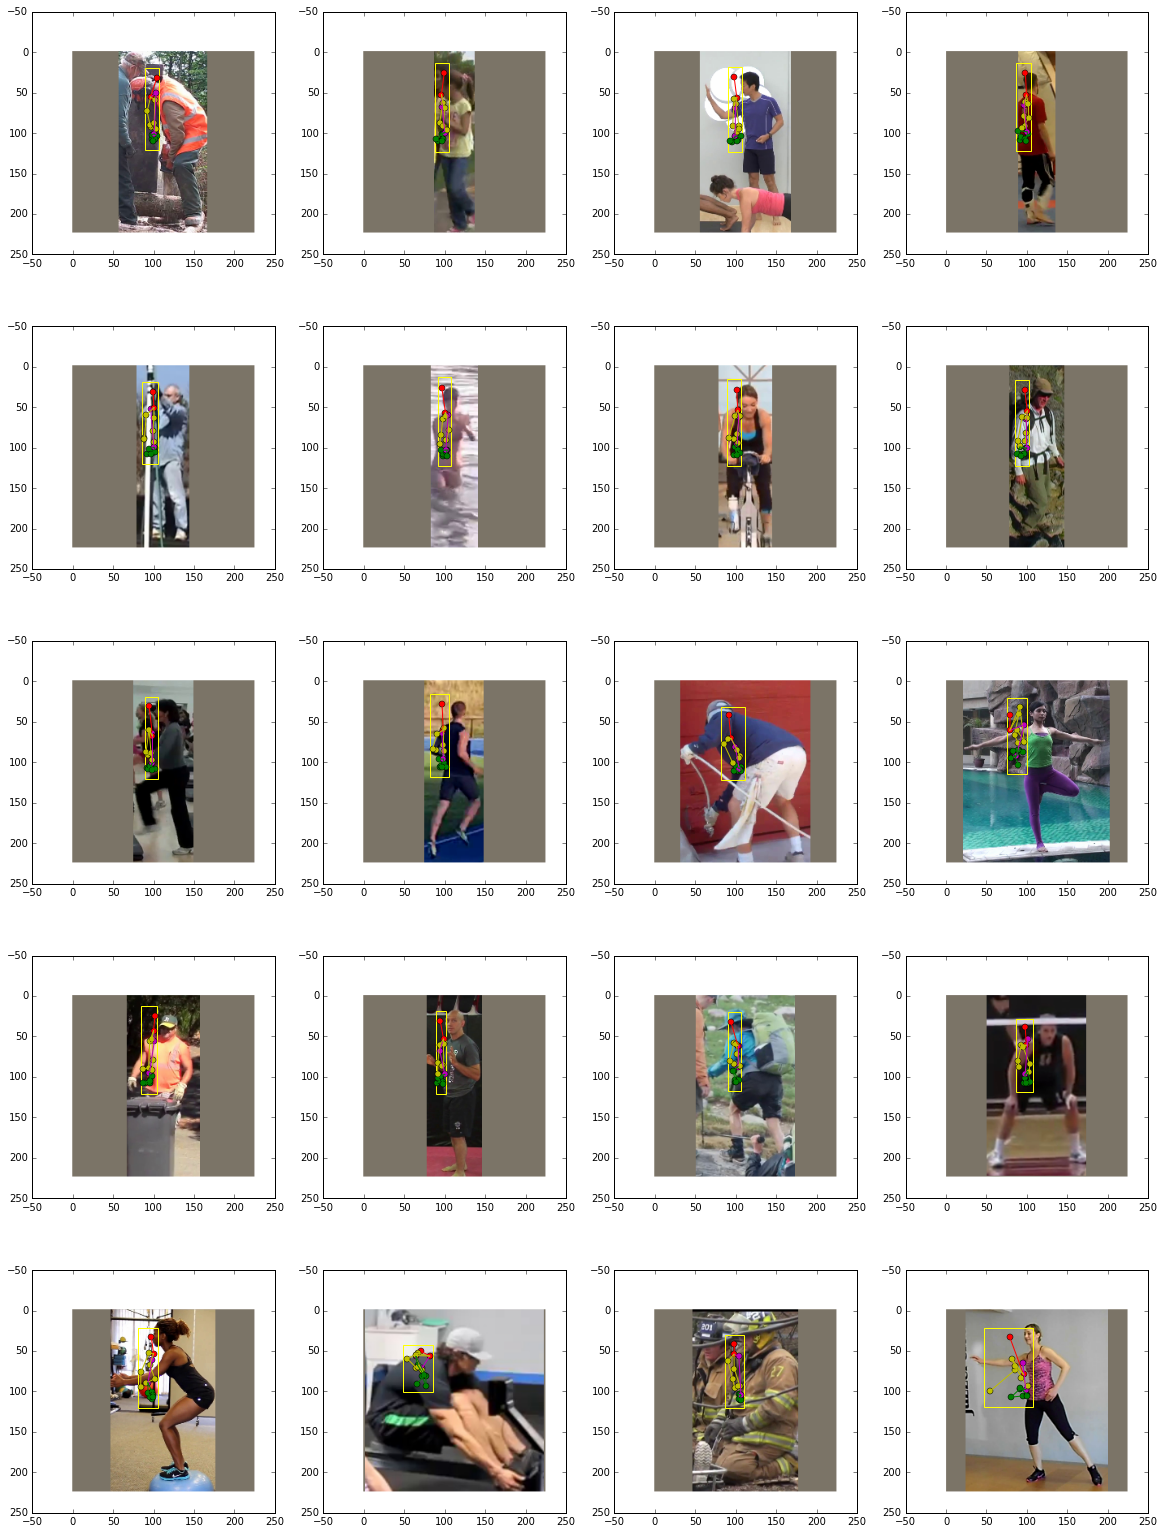

In [8]:
from dataloader import display_pose
plt.figure(figsize=(20,140))

with torch.no_grad():  
    net = torch.load(modelpath).to(device)
    net = net.eval()

    for i_batch, sample_batched in enumerate(tqdm(test_dataloader)):

        images = sample_batched['image'].to(device)
        poses = sample_batched['pose'].to(device)
        
        t0 = time.clock()
        coords, heatmaps = net(images)
        t1 = time.clock()
        print('average forward seconds=%f s| fps=%d'%((t1-t0),int(1/((t1-t0)))))
        for ids in range(40,60):
            display_pose(images[ids][:3,:,:],coords[ids],ids)
        
        plt.show()
        
        break

In [4]:
print(coords)

tensor([[[-0.0964, -0.0117],
         [-0.1438, -0.0465],
         [-0.0947, -0.0943],
         ...,
         [-0.1284, -0.3034],
         [-0.0605, -0.1358],
         [-0.0662, -0.1195]],

        [[-0.1203, -0.0248],
         [-0.2069, -0.0180],
         [-0.1218, -0.0835],
         ...,
         [-0.0667, -0.3798],
         [-0.0894, -0.1796],
         [-0.1043, -0.1306]],

        [[-0.1200, -0.0615],
         [-0.1567, -0.2159],
         [-0.1611, -0.1365],
         ...,
         [-0.5500, -0.3182],
         [-0.2279, -0.1355],
         [-0.2171, -0.2848]],

        ...,

        [[-0.1327, -0.0212],
         [-0.1731, -0.0393],
         [-0.1558, -0.0820],
         ...,
         [-0.0976, -0.3810],
         [-0.1190, -0.1849],
         [-0.0761, -0.1451]],

        [[-0.1212, -0.0328],
         [-0.1062, -0.0615],
         [-0.0988, -0.1162],
         ...,
         [-0.1098, -0.4418],
         [-0.0943, -0.3044],
         [-0.0735, -0.2042]],

        [[-0.1082, -0.0322],
       

In [5]:
print(poses)

tensor([[[ 0.1416,  0.7086],
         [-0.3945,  0.9545],
         [ 0.0460,  0.4795],
         ...,
         [ 0.4491, -0.3247],
         [ 0.5156,  0.2586],
         [ 0.0211,  0.3378]],

        [[-0.0072,  0.7782],
         [-0.0145,  0.4424],
         [-0.0362,  0.0994],
         ...,
         [ 0.1738, -0.4262],
         [ 0.2245, -0.1999],
         [ 0.2535,  0.0337]],

        [[ 0.7131, -0.3909],
         [ 0.6963, -0.0457],
         [ 0.2033, -0.1682],
         ...,
         [-0.3457, -0.0735],
         [-0.2392,  0.2717],
         [-0.5249,  0.4054]],

        ...,

        [[-0.3876,  0.7678],
         [-0.2101,  0.3845],
         [-0.0933,  0.0417],
         ...,
         [ 0.1337, -0.4589],
         [ 0.2303, -0.2537],
         [ 0.3899, -0.0034]],

        [[-0.1957,  0.7634],
         [-0.1740,  0.3086],
         [-0.1087,  0.1004],
         ...,
         [ 0.2175, -0.2942],
         [ 0.3045, -0.0312],
         [ 0.2392,  0.0565]],

        [[ 0.3152,  0.9174],
       

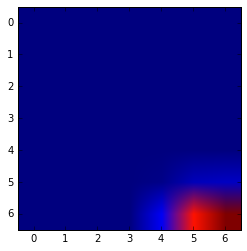

In [6]:
plt.imshow(heatmaps[0, 0].data.cpu().numpy())
plt.show()